In [1]:
#Imports
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from sklearn import preprocessing
from sklearn.model_selection import train_test_split

print(tf.__version__)

1.13.1


In [2]:
#Checking GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14039813314103125629
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13614457011416353973
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1819437045184124849
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11276946637
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1172780279005408103
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
#Upload csv in google collab version
from google.colab import files
uploaded = files.upload()

Saving cemento.csv to cemento.csv


In [4]:
concrete_data = pd.read_csv('cemento.csv', delimiter=';')
concrete_data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,252.000000,0.0,0.000000,185.000000,0.0,1111.000000,784.000000,7.0,13.710000
1,295.799988,0.0,0.000000,185.699997,0.0,1091.400024,769.299988,7.0,14.840000
2,252.300003,0.0,98.800003,146.300003,14.2,987.799988,889.000000,3.0,21.780001
3,172.399994,13.6,172.399994,156.800003,4.1,1006.299988,856.400024,28.0,33.689999
4,162.000000,214.0,164.000000,202.000000,10.0,820.000000,680.000000,28.0,30.650000


In [5]:
min_d = concrete_data.min()
max_d = concrete_data.max()
normalized_df=(concrete_data - min_d)/(max_d - min_d)
normalized_df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,0.342466,0.000000,0.000000,0.504792,0.000000,0.901163,0.476668,0.016484,0.141772
1,0.442466,0.000000,0.000000,0.510383,0.000000,0.844186,0.439789,0.016484,0.155849
2,0.343151,0.000000,0.493753,0.195687,0.440994,0.543023,0.740090,0.005495,0.242307
3,0.160731,0.037841,0.861569,0.279553,0.127329,0.596802,0.658304,0.074176,0.390681
4,0.136986,0.595437,0.819590,0.640575,0.310559,0.055233,0.215755,0.074176,0.352809


In [6]:
desnormalized_df = normalized_df * (max_d - min_d) + min_d
desnormalized_df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,252.000000,0.0,0.000000,185.000000,0.0,1111.000000,784.000000,7.0,13.710000
1,295.799988,0.0,0.000000,185.699997,0.0,1091.400024,769.299988,7.0,14.840000
2,252.300003,0.0,98.800003,146.300003,14.2,987.799988,889.000000,3.0,21.780001
3,172.399994,13.6,172.399994,156.800003,4.1,1006.299988,856.400024,28.0,33.689999
4,162.000000,214.0,164.000000,202.000000,10.0,820.000000,680.000000,28.0,30.650000


In [0]:

normal_train = normalized_df.iloc[:,:8]
normal_label = normalized_df.iloc[:,-1:]


In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(normal_train, normal_label, test_size = 0.15, random_state = 1)


In [9]:
print(xtrain.shape)
print(ytrain.shape)


print(xtest.shape)
print(ytest.shape)

(875, 8)
(875, 1)
(155, 8)
(155, 1)


In [10]:
len(xtrain.keys())

8

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(30, activation=tf.nn.relu, input_shape=[len(xtrain.keys())]),
    layers.Dense(20, activation=tf.nn.relu),
    layers.Dense(10, activation=tf.nn.relu),
    layers.Dense(1, activation=tf.nn.sigmoid)
  ])

  optimizer = tf.keras.optimizers.SGD(lr=0.01)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [0]:
model = build_model()


In [29]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,111
Trainable params: 1,111
Non-trainable params: 0
_________________________________________________________________


In [30]:
example_batch = xtrain[:10]
example_result = model.predict(example_batch)
example_result

array([[0.4987743 ],
       [0.49287435],
       [0.51363033],
       [0.49760866],
       [0.50006205],
       [0.50162417],
       [0.52405214],
       [0.515995  ],
       [0.50548416],
       [0.49020624]], dtype=float32)

In [0]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 1000 == 0:
      print('epoch: ', epoch,' loss: ', logs["loss"], "val_loss", logs["val_loss"])


In [31]:

EPOCHS = 13000

history = model.fit(
  xtrain, ytrain,
  epochs=EPOCHS, verbose=0,validation_split = 0.2,
  callbacks=[PrintDot()])

epoch:  0  loss:  0.04955568381718227 val_loss 0.04844952985644341
epoch:  1000  loss:  0.009187256214874132 val_loss 0.0095331486420972
epoch:  2000  loss:  0.005608517269470862 val_loss 0.006350947444194129
epoch:  3000  loss:  0.00476196507790259 val_loss 0.005403689672904355
epoch:  4000  loss:  0.004332290525947299 val_loss 0.004923069596822773
epoch:  5000  loss:  0.004013714949999537 val_loss 0.004744443504938058
epoch:  6000  loss:  0.0037239771416144713 val_loss 0.0046077688756797994
epoch:  7000  loss:  0.0035357459727674723 val_loss 0.004486980313169105
epoch:  8000  loss:  0.0033814395059432304 val_loss 0.004367853520171983
epoch:  9000  loss:  0.0032440686505287885 val_loss 0.004306159937488181
epoch:  10000  loss:  0.003132971104766641 val_loss 0.004211699592747859
epoch:  11000  loss:  0.0030271168399069993 val_loss 0.004177076879755727
epoch:  12000  loss:  0.0029510008690080474 val_loss 0.004140237386205367


In [32]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()


,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,0.049556,0.184303,0.049556,0.048450,0.186399,0.048450,0
1,0.047683,0.180306,0.047683,0.046911,0.182225,0.046911,1
2,0.046156,0.176762,0.046156,0.045675,0.178768,0.045675,2
3,0.044922,0.173759,0.044922,0.044677,0.175991,0.044677,3
4,0.043910,0.171271,0.043910,0.043875,0.173692,0.043875,4


In [33]:
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
12995,0.002877,0.040087,0.002877,0.004124,0.046970,0.004124,12995
12996,0.002860,0.039907,0.002860,0.004084,0.046619,0.004084,12996
12997,0.002871,0.040044,0.002871,0.004097,0.046763,0.004097,12997
12998,0.002868,0.039825,0.002868,0.004086,0.046665,0.004086,12998
12999,0.002867,0.039911,0.002867,0.004087,0.046698,0.004087,12999


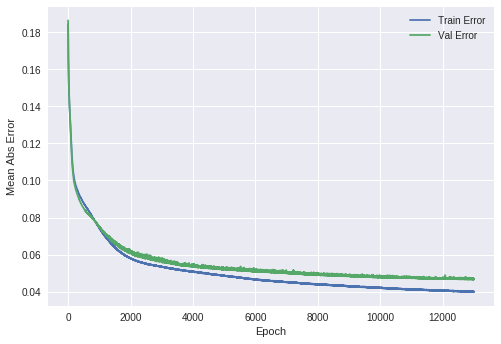

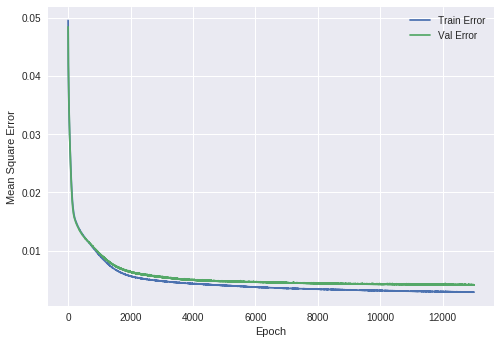

In [34]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history)

In [0]:

#Test code for early stopping
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(xtrain, ytrain, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [35]:
loss, mae, mse = model.evaluate(xtest, ytest, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

Testing set Mean Abs Error:  0.06 


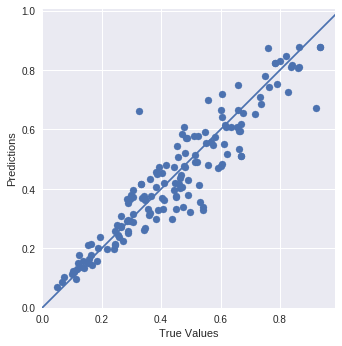

In [36]:
test_predictions = model.predict(xtest).flatten()

plt.scatter(ytest, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])